# Proyek Analisis Data: Nama dataset
- Nama: Dimas Rangga Saputra
- Email:Dimasranggasaputra3@gmail.com
- Id Dicoding:dimasrngga

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh di weekdays dan weekend pada peminjaman?
- bagaimana pengaruh cuaca terhadap peminjaman sepeda?

## Menyaipkan semua library yang dibuthkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

## Data Wrangling

### Gathering Data

In [2]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

## HOUR

In [3]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
hour_df.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

### Cleaning Data

## hour

In [6]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
hour_df = hour_df.rename(columns={'weathersit':'weather',
                                 'yr':'year',
                                 'mnth':'month',
                                 'hr':'hour',
                                 'hum':'humidity',
                                 'cnt':'count'})
hour_df.head()                   

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
hour_df = hour_df.drop(columns=['instant','dteday','year'])

In [9]:
# change int columns to category
cols =['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
    hour_df[col] = hour_df[col].astype('category')
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


## Exploratory Data Analysis (EDA)

### Explore ...

[Text(0.5, 1.0, 'count of bikes during weekdays and weekends')]

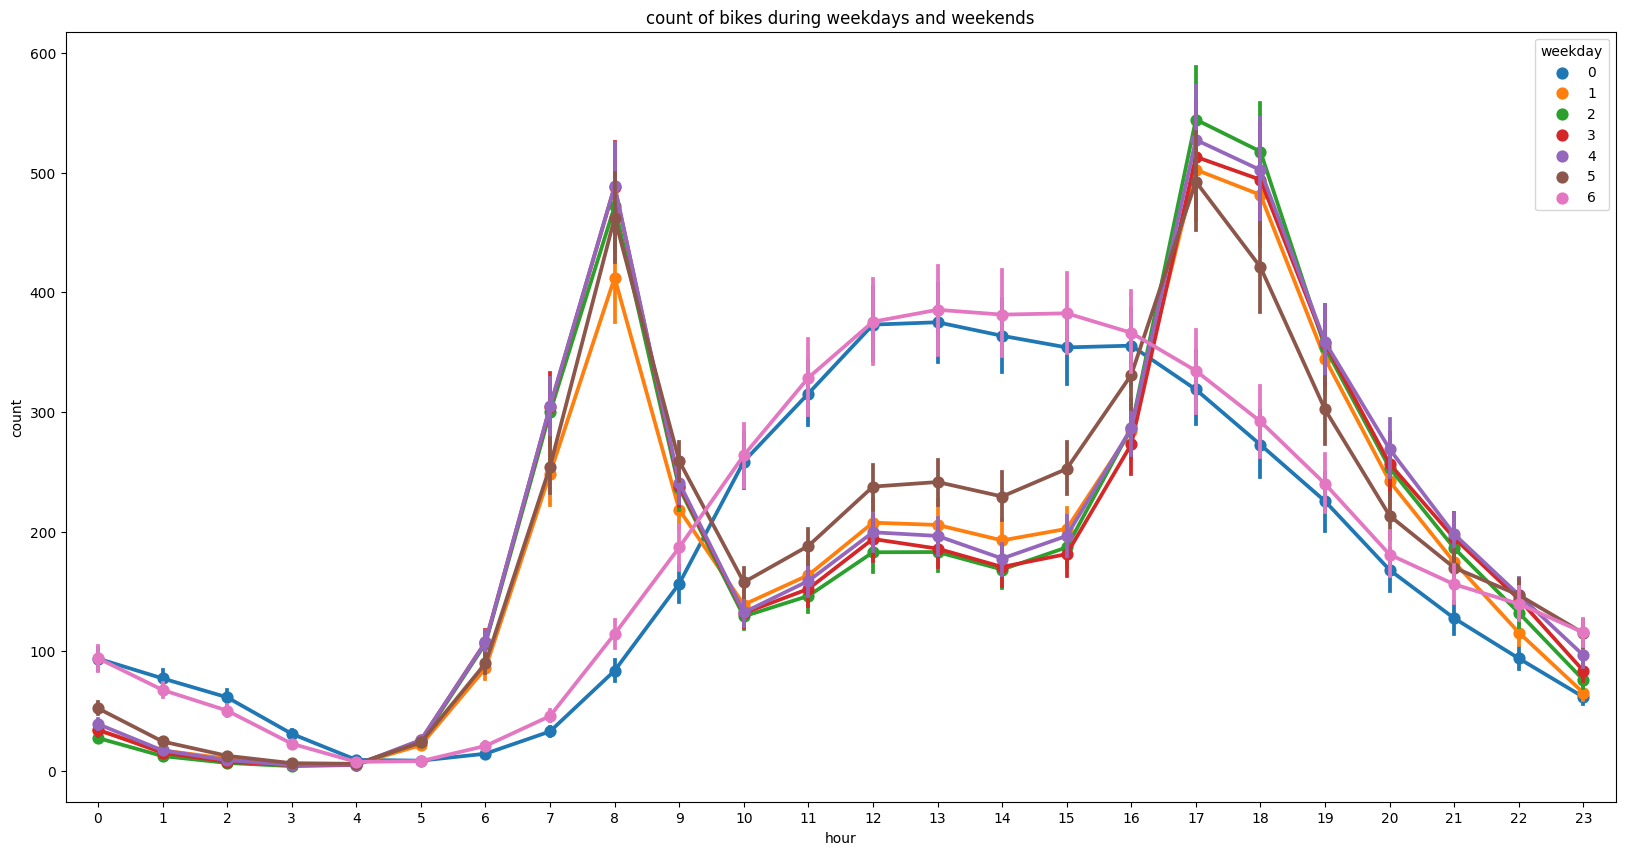

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hour_df, x='hour', y='count', hue='weekday',ax=ax)
ax.set(title='count of bikes during weekdays and weekends')              

[Text(0.5, 1.0, 'count of bikes during weekdays and weekends: unregistered users')]

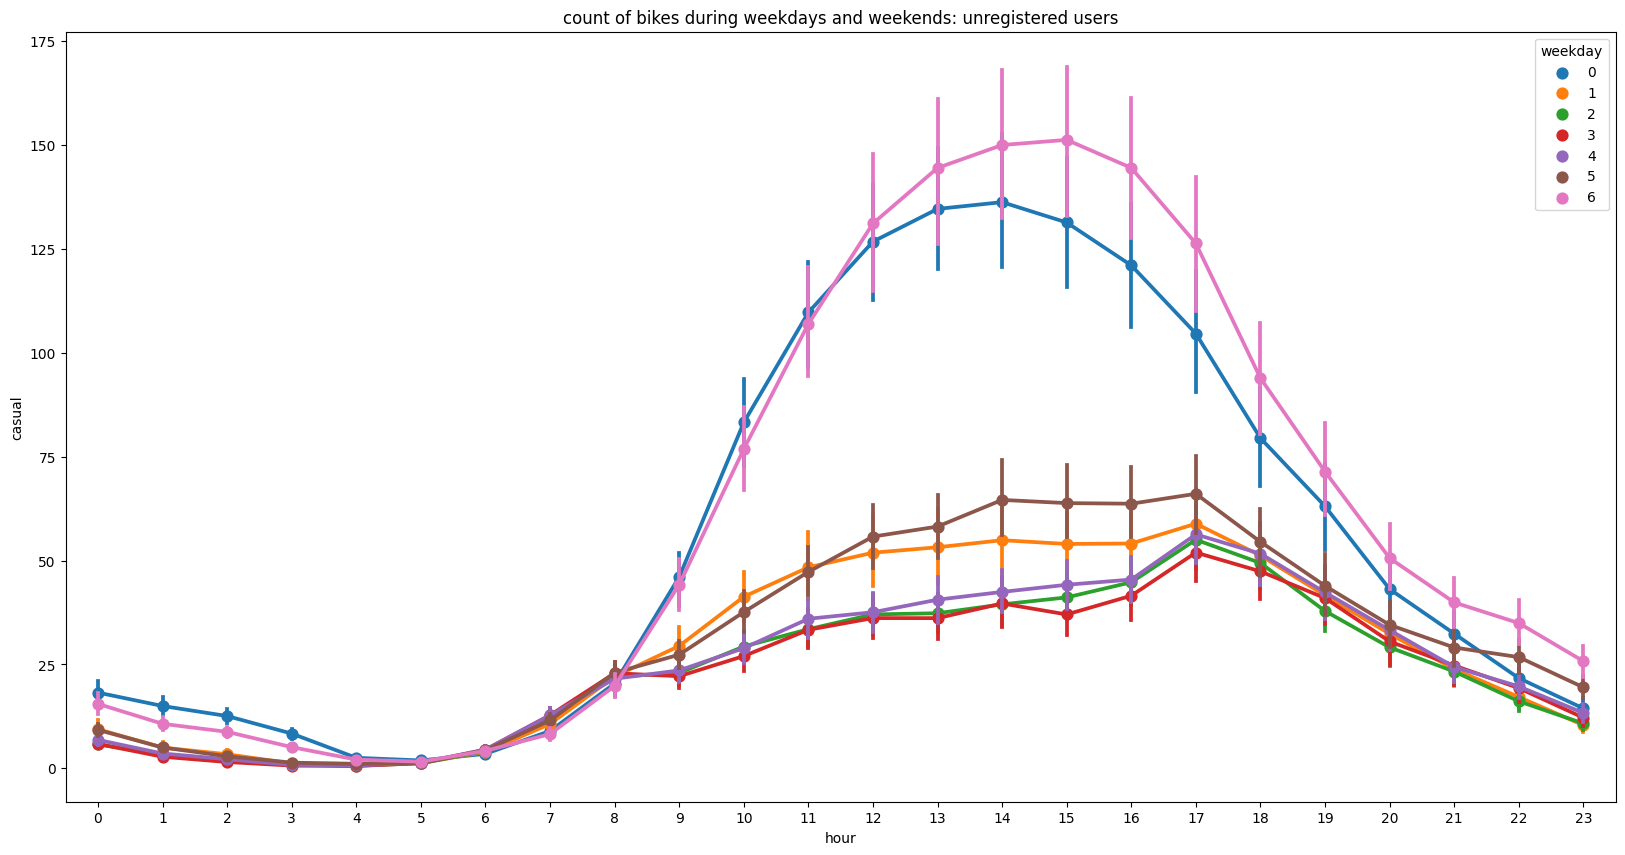

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hour_df, x='hour', y='casual', hue='weekday',ax=ax)
ax.set(title='count of bikes during weekdays and weekends: unregistered users')

[Text(0.5, 1.0, 'count of bikes during weekdays and weekends: registered users')]

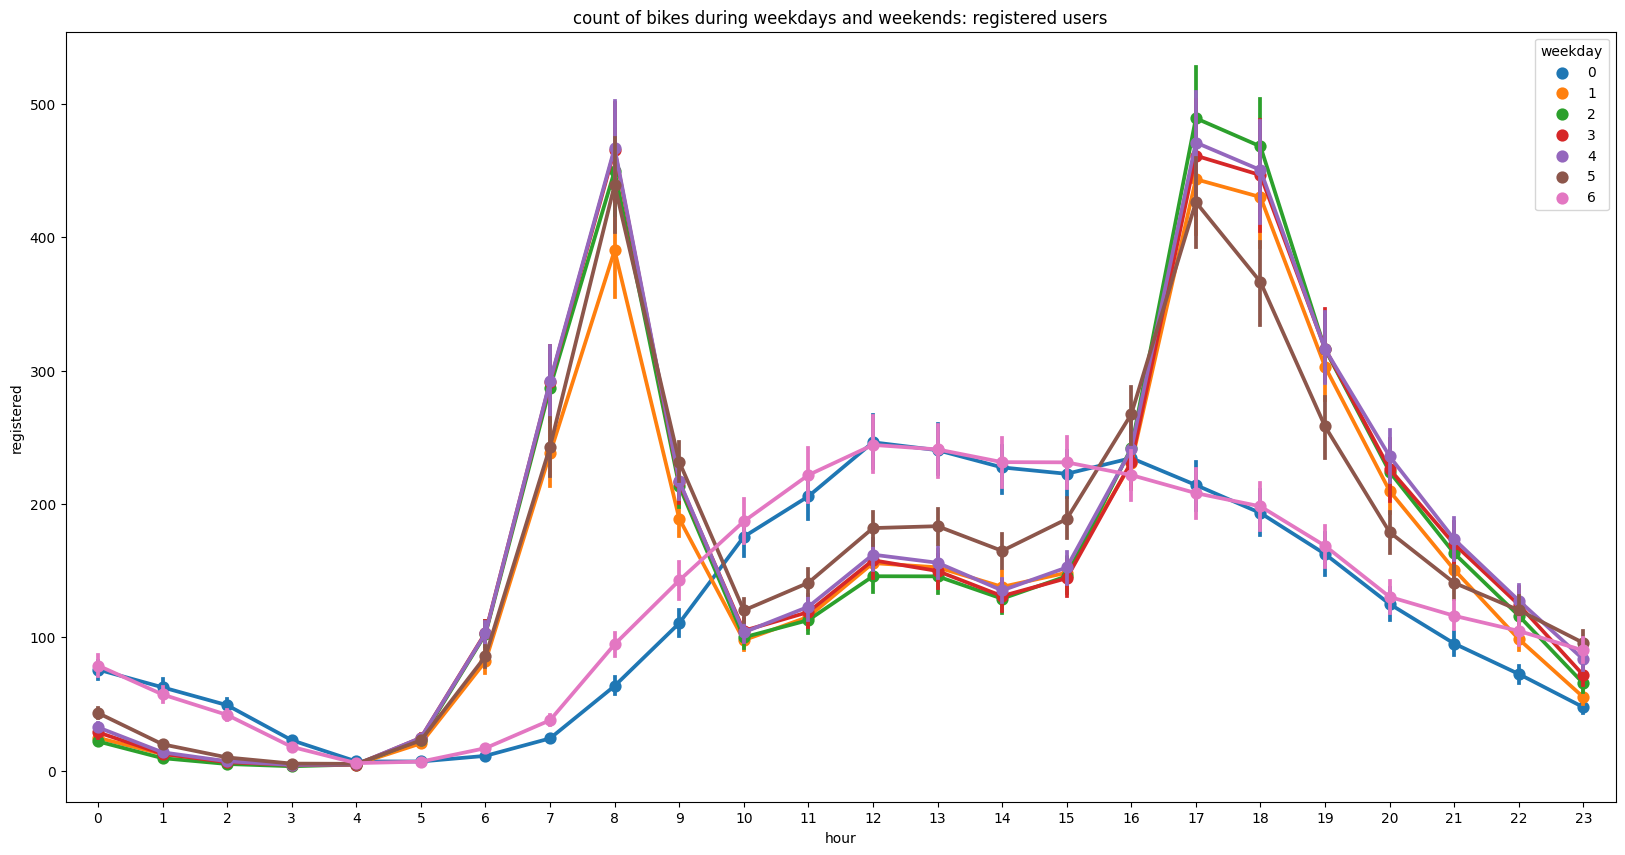

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hour_df, x='hour', y='registered', hue='weekday',ax=ax)
ax.set(title='count of bikes during weekdays and weekends: registered users')

[Text(0.5, 1.0, 'count of bikes during different weathers')]

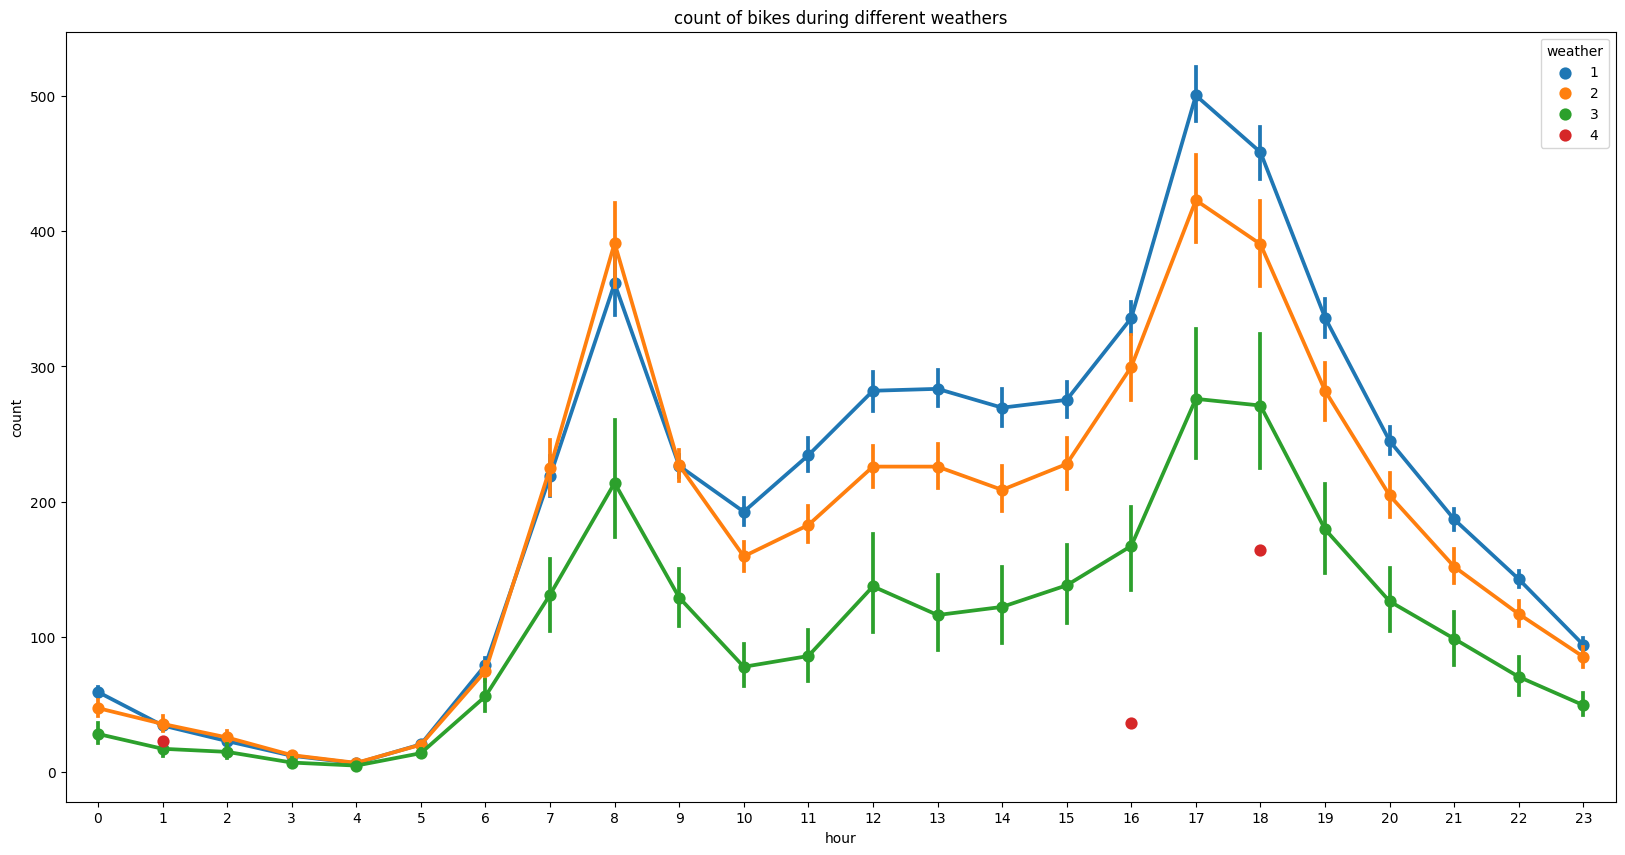

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hour_df, x='hour', y='count', hue='weather',ax=ax)
ax.set(title='count of bikes during different weathers')

[Text(0.5, 1.0, 'count of bikes during different seasons')]

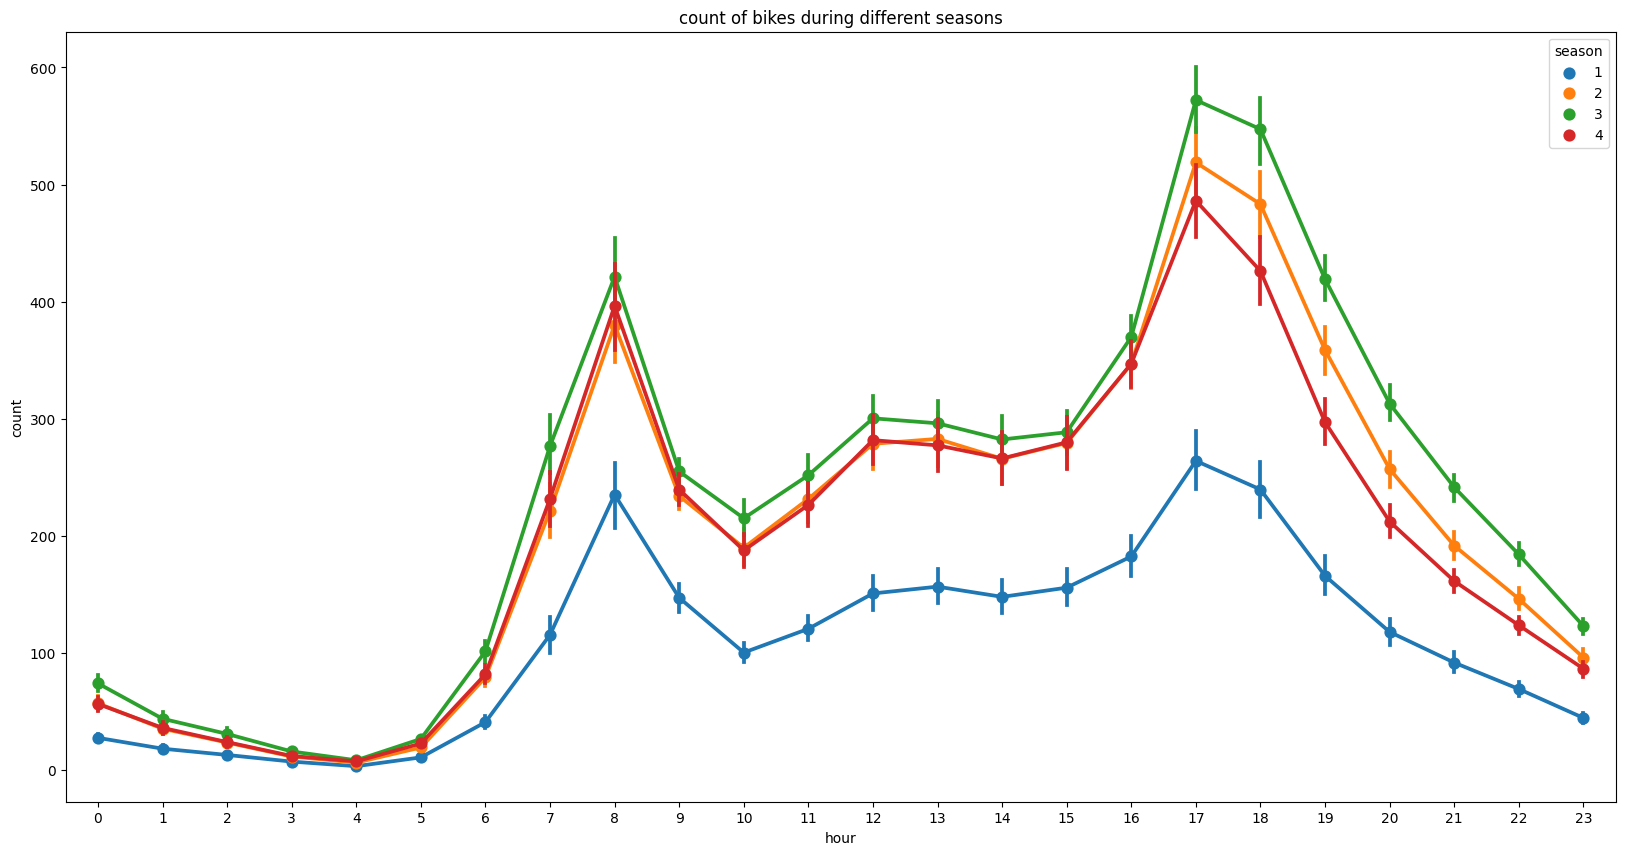

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hour_df, x='hour', y='count', hue='season',ax=ax)
ax.set(title='count of bikes during different seasons')

[Text(0.5, 1.0, 'count of bikes during different months')]

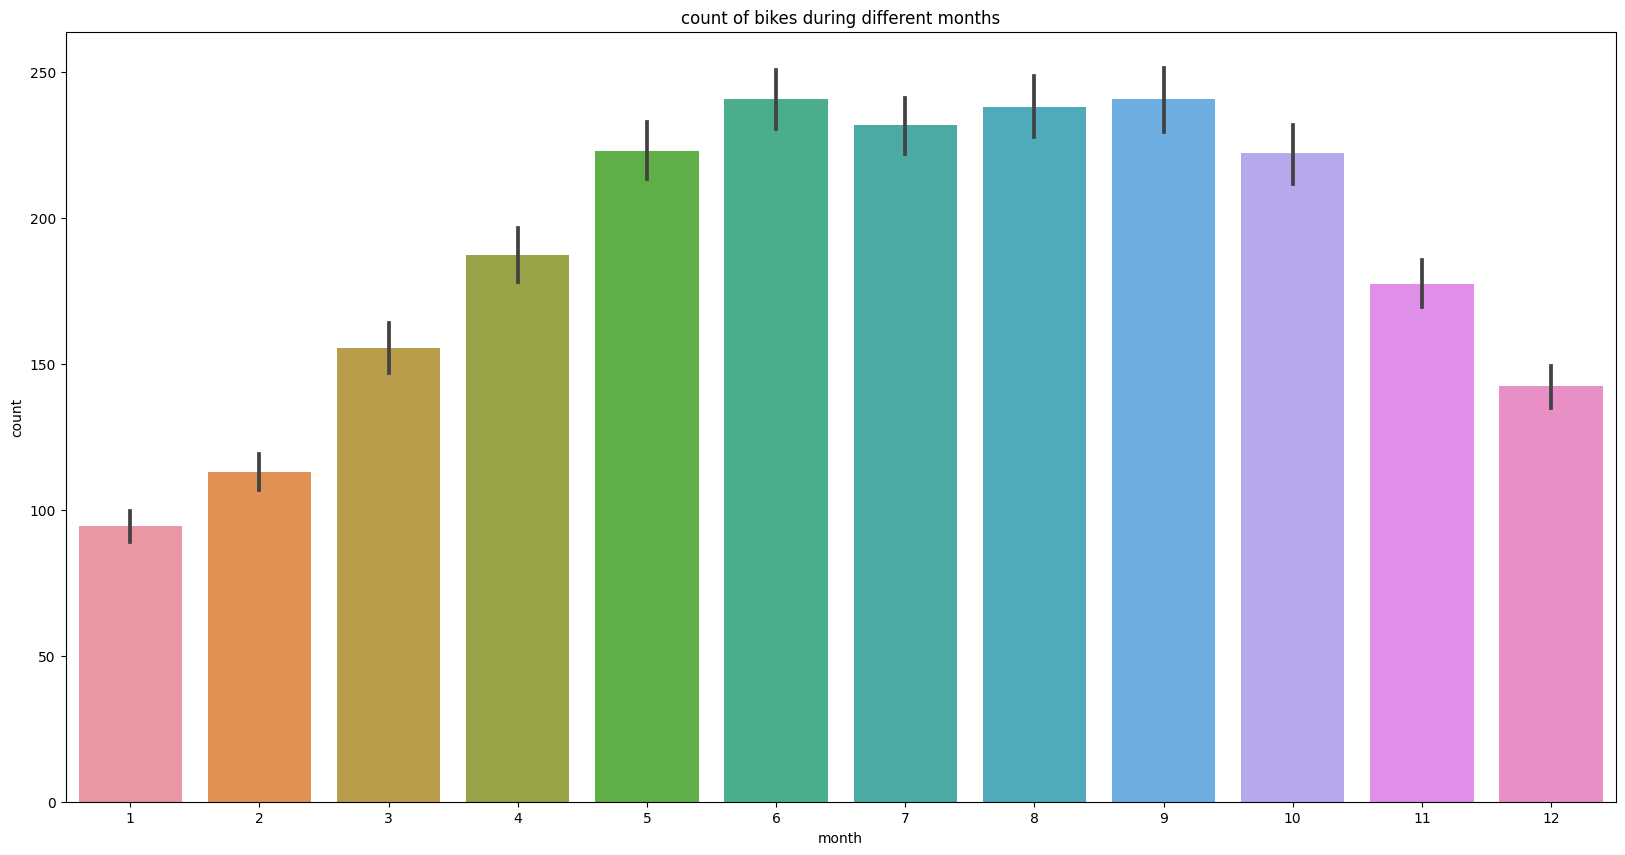

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=hour_df, x='month', y='count', ax=ax)
ax.set(title='count of bikes during different months')

[Text(0.5, 1.0, 'count of bikes during different days')]

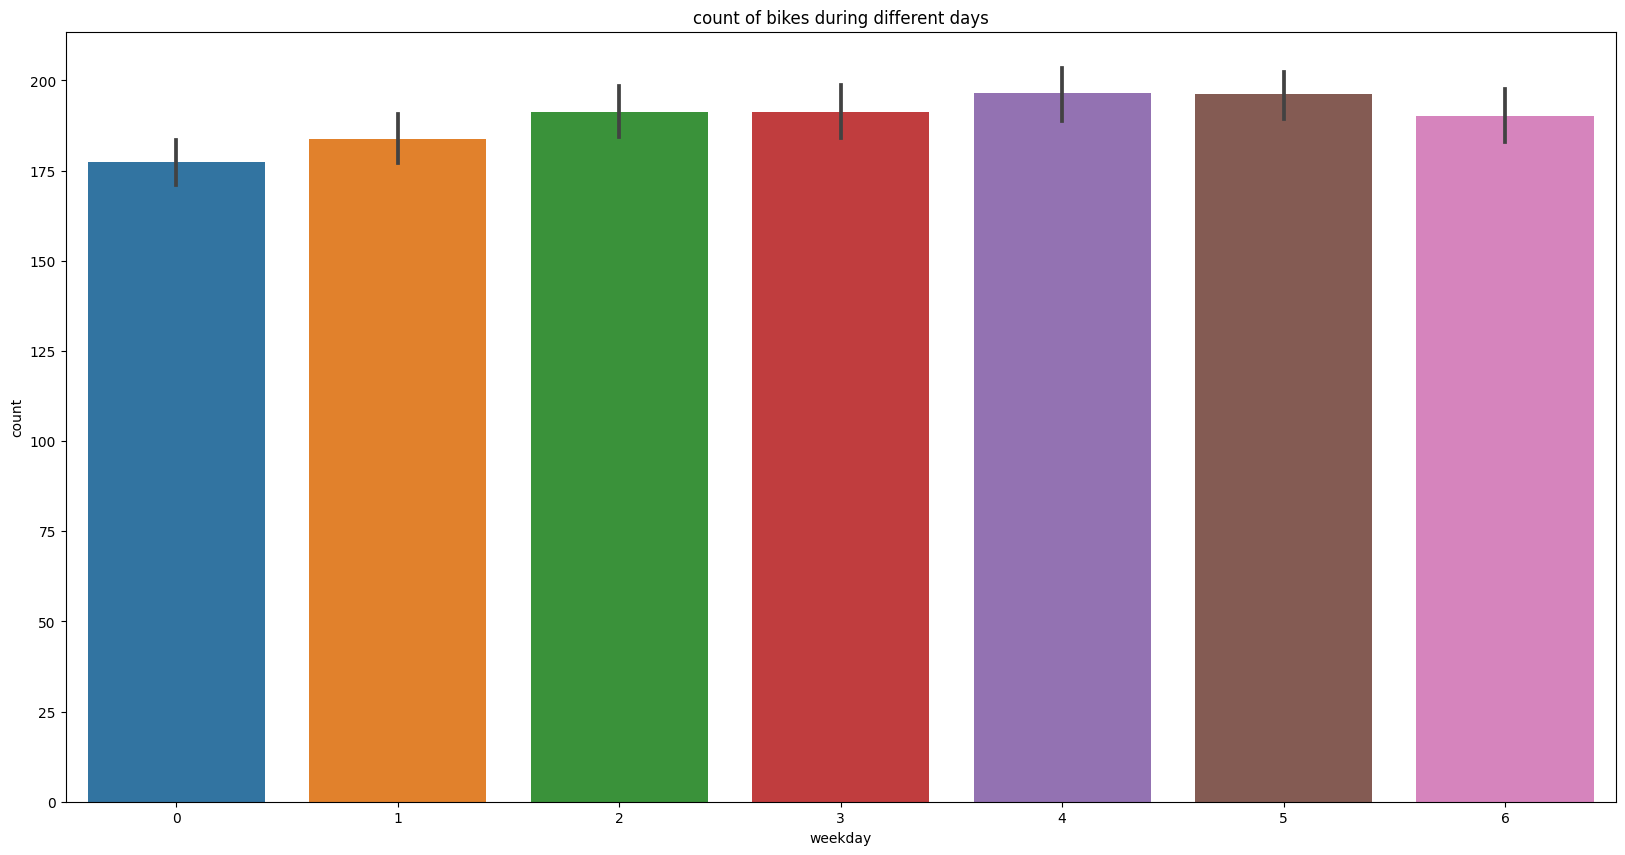

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=hour_df, x='weekday', y='count', ax=ax)
ax.set(title='count of bikes during different days')

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

### Bagaimana pengaruh di weekdays dan weekend pada peminjaman?

[Text(0.5, 1.0, 'count of bikes during weekdays and weekends')]

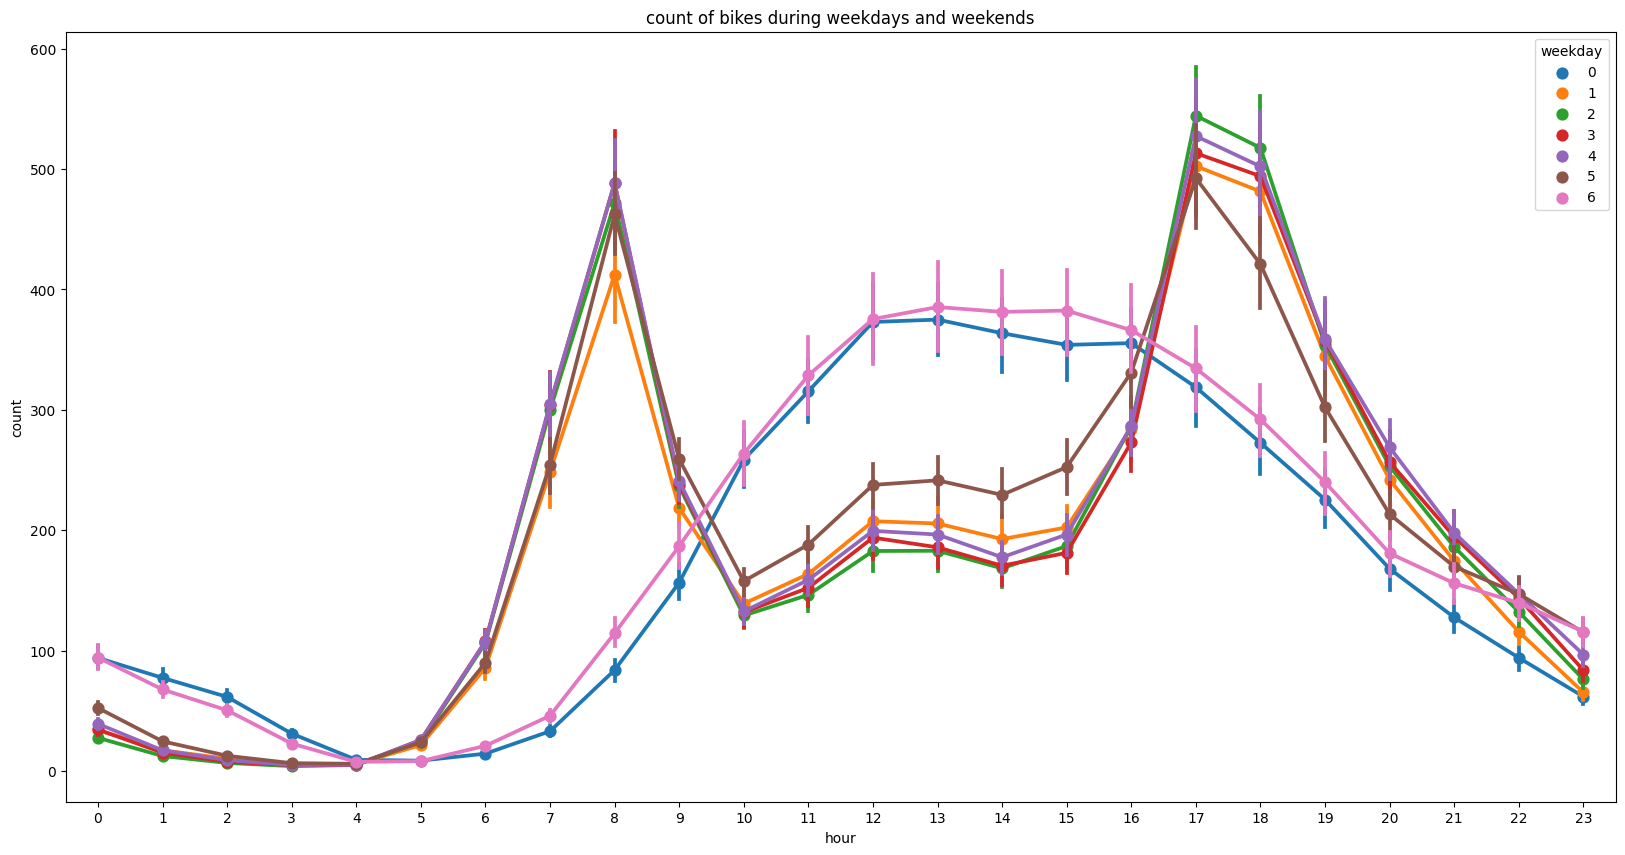

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hour_df, x='hour', y='count', hue='weekday',ax=ax)
ax.set(title='count of bikes during weekdays and weekends')

### Pertanyaan 2: 

### bagaimana pengaruh cuaca terhadap peminjaman sepeda?

[Text(0.5, 1.0, 'count of bikes during different weathers')]

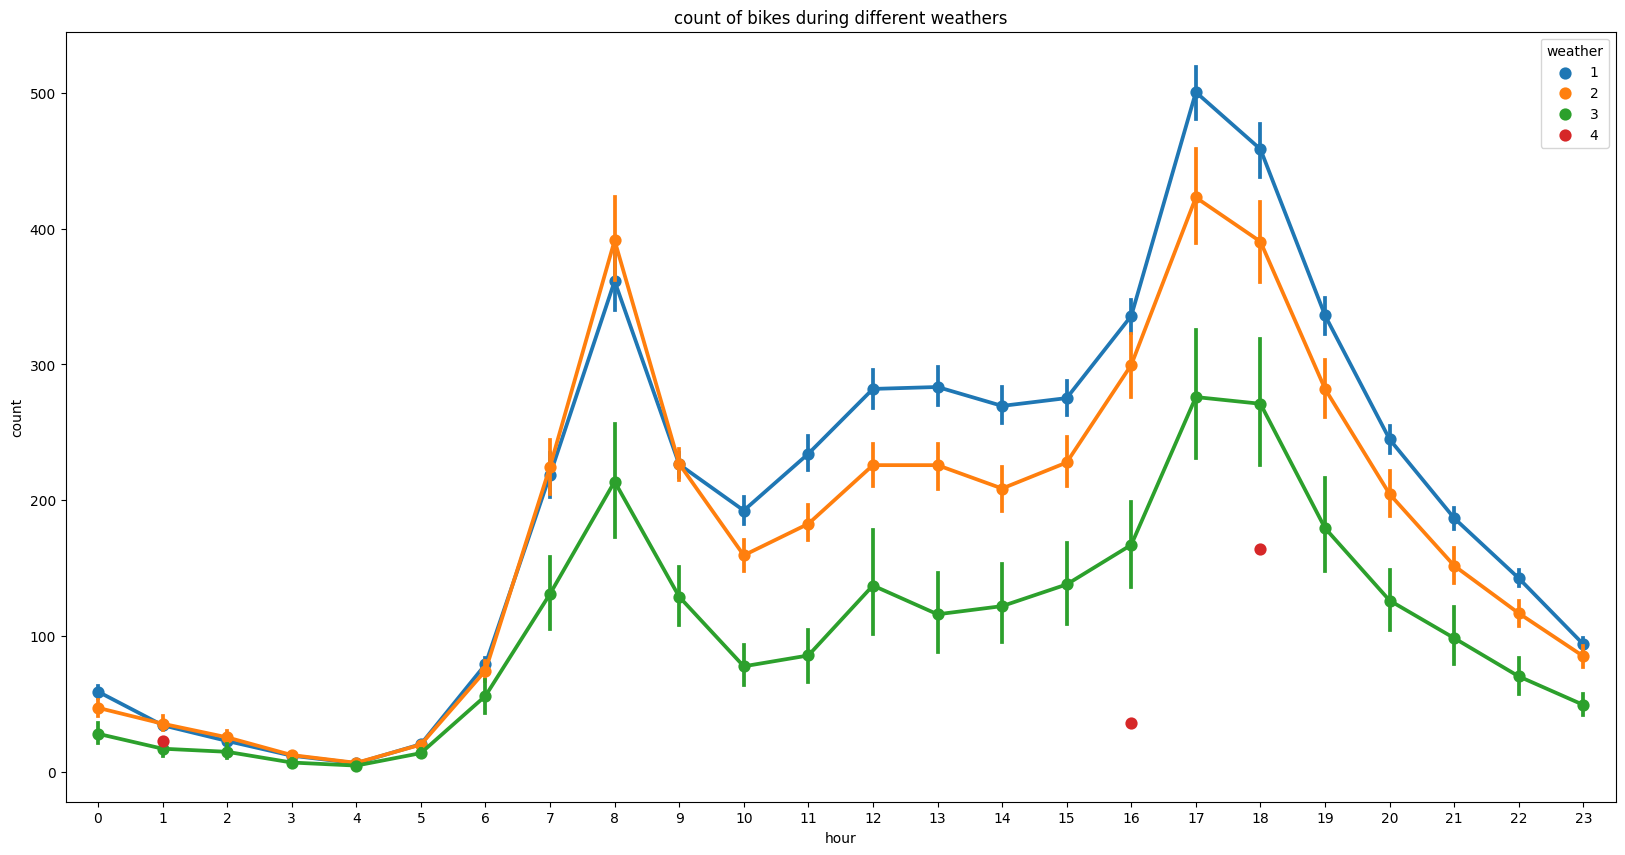

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hour_df, x='hour', y='count', hue='weather',ax=ax)
ax.set(title='count of bikes during different weathers')

## Conclusion

- Terdapat perbedaan garis pada pola pinjaman antara hari kerja dan akhir pekan.
  peminjaman pada hari kerja cenderung tinggi pada jam-jam sibuk pagi dan sore,
  sementara akhir pekan memiliki pola yang lebih rendah sepanjang hari 

- cuaca memliki dampak yang lumayan signifikan pada peminjaman sepeda.
  seperti grafik di atas, peminjaman sepeda cenderung lebih tinggi pada warna biru
  menadakan suhu yang nyaman dan sedikit berawan atau tidak ada hujan

In [19]:
hour_df.to_csv("all_data.csv", index=False)